In [7]:
# Cell 1: Setting up the source code

import subprocess
import shlex

subprocess.run(shlex.split('python3 ./waf-2.0.24 configure'), cwd='./graph_sketch_fractality')
subprocess.run(shlex.split('python3 ./waf-2.0.24'), cwd='./graph_sketch_fractality')

Setting top to                           : /work/graph_sketch_fractality 
Setting out to                           : /work/graph_sketch_fractality/bin 
Checking for 'g++' (C++ compiler)        : /usr/bin/g++ 
Unpacking gtest                          : yes 
Checking for library pthread             : yes 
'configure' finished successfully (0.263s)
Waf: Entering directory `/work/graph_sketch_fractality/bin'
[ 1/24] Compiling 3rd_party/gflags/gflags.cc
[ 2/24] Compiling 3rd_party/gflags/gflags_completions.cc
[ 3/24] Compiling 3rd_party/gflags/gflags_reporting.cc
[ 4/24] Compiling src/graph/io.cc
[ 5/24] Compiling src/box_cover/box_cover.cc
[ 6/24] Compiling src/graph/generator.cc
[ 7/24] Compiling src/base/jlog.cc
[ 8/24] Compiling src/base/type.cc
[ 9/24] Compiling src/base/functions.cc
[10/24] Compiling src/base/random.cc
[11/24] Compiling 3rd_party/gtest/gtest_main.cc
[12/24] Compiling 3rd_party/gtest/gtest_all.cc
[13/24] Compiling src/box_cover/box_cover_main.cc
[14/24] Compiling src/g

In file included from /usr/include/c++/11/cstdio:41,
                 from ../3rd_party/gtest/gtest.h:58,
                 from ../3rd_party/gtest/gtest_main.cc:38:
/usr/include/x86_64-linux-gnu/c++/11/bits/c++config.h:573:2: warning: #warning "__STRICT_ANSI__ seems to have been undefined; this is not supported" [-Wcpp]
  573 | #warning "__STRICT_ANSI__ seems to have been undefined; this is not supported"
      |  ^~~~~~~

In file included from ../3rd_party/gflags/util.h:39,
                 from ../3rd_party/gflags/gflags_reporting.cc:61:
../3rd_party/gflags/gflags_reporting.cc: In function ‘std::string google::DescribeOneFlag(const google::CommandLineFlagInfo&)’:
../3rd_party/gflags/gflags_reporting.cc:129:23: warning: comparison of integer expressions of different signedness: ‘int’ and ‘size_t’ {aka ‘long unsigned int’} [-Wsign-compare]
  129 |     assert(chars_left == strlen(c_string));  // Unless there's a \0 in there?
      |            ~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~

In file inc

[20/24] Linking bin/3rd_party/libgflags.a
[21/24] Linking bin/libagl.a
[22/24] Linking bin/box_cover


../src/box_cover/box_cover_test.cc: In member function ‘virtual void box_cover_coloring_Test::TestBody()’:
../src/box_cover/box_cover_test.cc:301:8: warning: suggest explicit braces to avoid ambiguous ‘else’ [-Wdangling-else]
  301 |     if (m[c.first] > 0)
      |        ^

In file included from /usr/include/c++/11/cstdio:41,
                 from ../3rd_party/gtest/gtest.h:58,
                 from ../3rd_party/gtest/gtest_all.cc:39:
/usr/include/x86_64-linux-gnu/c++/11/bits/c++config.h:573:2: warning: #warning "__STRICT_ANSI__ seems to have been undefined; this is not supported" [-Wcpp]
  573 | #warning "__STRICT_ANSI__ seems to have been undefined; this is not supported"
      |  ^~~~~~~



[23/24] Linking bin/3rd_party/libgtest.a
[24/24] Linking bin/test
Waf: Leaving directory `/work/graph_sketch_fractality/bin'
'build' finished successfully (8.641s)


CompletedProcess(args=['python3', './waf-2.0.24'], returncode=0)

In [24]:
# Cell 2: Converting the shell command to a python method- runAlgorithm


# import subprocess
# import shlex


def runAlgorithm(**kwargs):
    
    # Default arguments of the method:
    default_args = {'type': 'gen', 'graph': "flower 1000 1 2", 'method': 'sketch', 'alpha': '1', 'least_coverage': '1',
           'sketch_k': '128', 'multipass': '10000', 'rad_min': '1', 'rad_max': '30', 'random_seed': '114514'}
    
    options = ""
    
    for key in kwargs:
        default_args[key] = kwargs[key]
        
    if default_args['type'] == 'gen':
        a = default_args['graph']
        default_args['graph'] = f'"{a}"'
            
    for key in default_args:
        options += f" -{key}={default_args[key]}"
        
    subprocess.run(shlex.split(f"./bin/box_cover {options}"), cwd='./graph_sketch_fractality')

In [63]:
import graph_tool.all as gt
import csv
import traceback
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [51]:
netscience_graph = gt.collection.ns["libimseti"]
# netscience_graph = gt.collection.ns["facebook_organizations/M1"]

In [52]:
if "weight" not in netscience_graph.edge_properties:
    netscience_graph.edge_properties["weight"] = netscience_graph.new_edge_property("int", val=-1)
else:
    netscience_graph.ep.weight.a *= -1

netscience_graph.ep.weight[netscience_graph.edges().next()]

-8

In [53]:
max_span_tree = gt.min_spanning_tree(netscience_graph, netscience_graph.ep.weight)
mst_graph = gt.GraphView(netscience_graph, efilt=max_span_tree)

In [54]:
mst_graph.num_edges

<bound method Graph.num_edges of <GraphView object, directed, with 220970 vertices and 220969 edges, 1 internal vertex property, 1 internal edge property, 7 internal graph properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7efbd1614a90, at 0x7efbcf290b50>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7efbd1614a90, at 0x7efbcf2908b0>, False), at 0x7efbd1614a90>>

In [55]:
netscience_graph.num_edges

<bound method Graph.num_edges of <Graph object, directed, with 220970 vertices and 17359346 edges, 1 internal vertex property, 1 internal edge property, 7 internal graph properties, at 0x7efbcf1f94e0>>

In [56]:
def saveTSV(filePath, graph):
    with open(filePath, "w", newline="") as tsvfile:
        writer = csv.writer(tsvfile, delimiter="\t")
        # Write header row
        # writer.writerow(["source", "target", "source_name", "target_name", "edge_weight"])

        for e in graph.edges():
            source = e.source()
            target = e.target()
            # source_name = graph.vertex_properties["name"][source]  # Access vertex property
            # target_name = graph.vertex_properties["name"][target]
            # edge_weight = graph.edge_properties["weight"][e]  # Access edge property
            writer.writerow([source, target
                            #  , source_name, target_name, edge_weight
                             ])

In [ ]:
saveTSV(filePath='./libimseti.tsv', graph=netscience_graph)

In [ ]:
runAlgorithm(type = 'tsv',graph = "../libimseti.tsv")

[0212 01:15:40] JLOG: box_cover.9f89a6ef4075.jlog.250212-011540.10411
[0212 01:15:40] run.program = box_cover
[0212 01:15:40] run.args = ./bin/box_cover
[0212 01:15:40] run.args = -type=tsv
[0212 01:15:40] run.args = -graph=../fb_org_m1.tsv
[0212 01:15:40] run.args = -method=sketch
[0212 01:15:40] run.args = -alpha=1
[0212 01:15:40] run.args = -least_coverage=1
[0212 01:15:40] run.args = -sketch_k=128
[0212 01:15:40] run.args = -multipass=10000
[0212 01:15:40] run.args = -rad_min=1
[0212 01:15:40] run.args = -rad_max=30
[0212 01:15:40] run.args = -random_seed=114514
[0212 01:15:40] run.machine = 9f89a6ef4075
[0212 01:15:40] run.date = 2025/02/12 01:15:40
[0212 01:15:40] run.user = =========
  Vertices: 220970
  Edges: 34466288
  Type: agl::basic_graph<int>
----------
  0 -> 127, 132, 719, 970, 1094, 1615, 1977, 2144, 2210, 3345, ...
  1 -> 72, 132, 133, 230, 267, 1559, 1870, 2677, 3952, 4339, ...
  2 -> 13894, 15529, 25082, 31624, 86776, 93171, 93384, 93890, 105719, 110096, ...
  3 -> 

In [ ]:
import datetime
endDate = datetime.datetime.now()

In [216]:
# Cell 4: printing the results

import glob
import os
import json


list_of_files = glob.glob('./graph_sketch_fractality/jlog/*')
# latest_file = max(list_of_files, key=os.path.getctime) libimset_box_cover.9f89a6ef4075.jlog.250212-011540.10411
latest_file = './graph_sketch_fractality/jlog/libimset_box_cover.9f89a6ef4075.jlog.250212-011540.10411'

f = open(latest_file, "r").read()
json_file = json.loads(f)

radius = json_file['radius']
size = json_file['size']

print (f"radius: \n{radius}\n")
print (f"size: \n{size}")
print(json_file)
# json_file

radius: 
[1, 2, 3, 4]

size: 
[13177, 98, 3, 1]
{'run': {'program': 'box_cover', 'args': ['./bin/box_cover', '-type=tsv', '-graph=../fb_org_m1.tsv', '-method=sketch', '-alpha=1', '-least_coverage=1', '-sketch_k=128', '-multipass=10000', '-rad_min=1', '-rad_max=30', '-random_seed=114514'], 'machine': '9f89a6ef4075', 'date': '2025/02/12', 'user': '', 'pid': 10411, 'time': 7527.23, 'memory': 2024263680}, 'graph_info': [{'vertices': 220970, 'edges': 34466288, 'graph': '../fb_org_m1.tsv'}], 'name': 'sketch-k.128', 'k': '128', 'pass': '10000', 'alpha': '1.000000', 'time': [59.0843, 1650.25, 2574.9, 3227.59], 'size': [13177, 98, 3, 1], 'radius': [1, 2, 3, 4], 'coverage': [1, 1, 1, 1], 'centers': [{'1': [156147, 31115, 33638, 71635, 108317, 60982, 89854, 61435, 117980, 76081, 90279, 116173, 327, 131975, 2410, 42784, 46377, 74410, 131790, 766, 1114, 2880, 5943, 6514, 8814, 10882, 15179, 16122, 16127, 24401, 27330, 30299, 36203, 39248, 39980, 40070, 44613, 66709, 84008, 90161, 95330, 99500, 1204

In [ ]:
def test():
    list_of_files = glob.glob('./graph_sketch_fractality/jlog/*')
    for file in list_of_files:
        f = open(file, 'r').read()
        try:
            json_file = json.loads(f)
            if(json_file['graph_info'][0]['graph'] == '../libimseti.tsv'):
                print(file)
                print(json_file['graph_info'][0]['vertices'])
                print(json_file['graph_info'][0]['edges'])
        except:
            print("incorrect file")


test()

incorrect file
./graph_sketch_fractality/jlog/fb_org_m1_box_cover.9f89a6ef4075.jlog.250212-005536.10406
1429
38714
./graph_sketch_fractality/jlog/libimset_box_cover.9f89a6ef4075.jlog.250212-011540.10411
220970
34466288
incorrect file
incorrect file
incorrect file


In [240]:
box_sizes = [rb for rb in radius]

In [241]:
x = np.array(box_sizes)
y = np.array(size)
x_log = np.log10(box_sizes)
y_log = np.log10(size)

In [242]:
fit_pl = linregress(x_log, y_log)
fit_exp = linregress(x, y_log)

In [243]:
y_log_pl = fit_pl.slope * x_log + fit_pl.intercept
y_log_exp = fit_exp.slope * x + fit_exp.intercept

In [244]:
x_plot = np.linspace(x.min(), x.max(), 100) # 
x_log_plot = np.log10(x_plot) # 
y_log_exp_plot = fit_exp.slope * x_plot + fit_exp.intercept

In [245]:
#marker='o', markersize=10, color=color, markerfacecolor=color_pale, markeredgewidth=linewidth, markeredgecolor=color, linewidth=linewidth

def set_plotting_style():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markeredgewidth'] = 2
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['font.size'] = 20
    plt.rcParams['legend.fontsize'] = 20 * 0.6
    plt.rcParams['figure.subplot.left'] = 0.25
    plt.rcParams['figure.subplot.right'] = 0.95
    plt.rcParams['figure.subplot.bottom'] = 0.2
    plt.rcParams['figure.subplot.top'] = 0.9
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['xtick.minor.width'] = 2
    plt.rcParams['xtick.major.size'] = 8
    plt.rcParams['xtick.major.width'] = 2
    plt.rcParams['ytick.left'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.minor.size'] = 4
    plt.rcParams['ytick.minor.width'] = 2
    plt.rcParams['ytick.major.size'] = 8
    plt.rcParams['ytick.major.width'] = 2

In [246]:
set_plotting_style()

#plt.rcParams['font.size'] = 18
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['axes.linewidth'] = 2

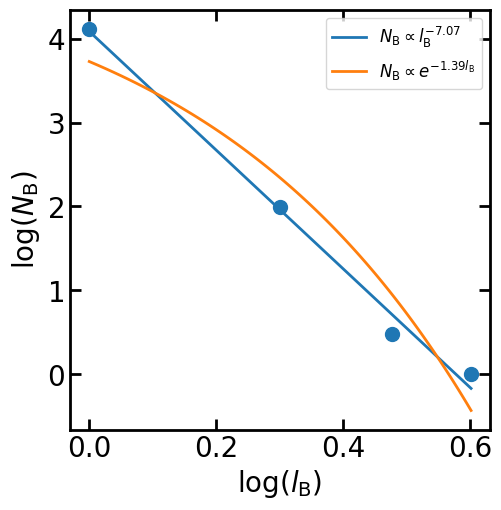

In [248]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_log, y_log)
plt.plot(x_log, y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_log_plot, y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xlabel('$\log(l_\mathrm{B})$')
plt.ylabel('$\log(N_\mathrm{B})$')
plt.legend()

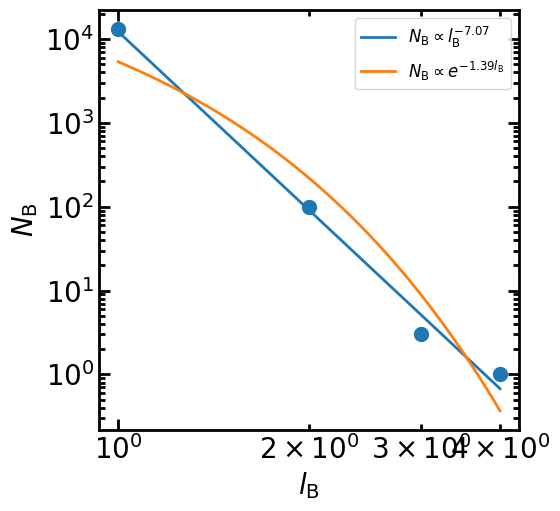

In [169]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, 10**y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_plot, 10**y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$l_\mathrm{B}$')
plt.ylabel('$N_\mathrm{B}$')
plt.legend()
plt.show()

In [170]:
# Weighted Mean Squared Error
def wmse(y_fit, x=x_log, y=y_log, w=size):
    return sum(w * (y_fit - y) ** 2) / sum(w) / len(y_fit)

In [171]:
wmse_pl = wmse(y_fit=y_log_pl)
wmse_pl

0.00026823105486569685

In [172]:
wmse_exp = wmse(y_fit=y_log_exp)
wmse_exp

0.03831254738168836

In [173]:
wmse_pl / wmse_exp

0.007001128173322639

### Same for the MST

In [ ]:
saveTSV(filePath='./libimseti_Tree.tsv', graph=mst_graph)

In [ ]:
runAlgorithm(type = 'tsv',graph = "../libimseti_Tree.tsv")

[0213 02:29:46] JLOG: box_cover.9f89a6ef4075.jlog.250213-022946.10775
[0213 02:29:46] run.program = box_cover
[0213 02:29:46] run.args = ./bin/box_cover
[0213 02:29:46] run.args = -type=tsv
[0213 02:29:46] run.args = -graph=../fb_org_m1_Tree.tsv
[0213 02:29:46] run.args = -method=sketch
[0213 02:29:46] run.args = -alpha=1
[0213 02:29:46] run.args = -least_coverage=1
[0213 02:29:46] run.args = -sketch_k=128
[0213 02:29:46] run.args = -multipass=10000
[0213 02:29:46] run.args = -rad_min=1
[0213 02:29:46] run.args = -rad_max=30
[0213 02:29:46] run.args = -random_seed=114514
[0213 02:29:46] run.machine = 9f89a6ef4075
[0213 02:29:46] run.date = 2025/02/13 02:29:46
[0213 02:29:46] run.user = =========
  Vertices: 220970
  Edges: 441938
  Type: agl::basic_graph<int>
----------
  0 -> 970, 13209, 14603, 26083, 63062, 64256
  1 -> 129611, 136179
  2 -> 130814
  3 -> 97581, 98677, 170934
  4 -> 203668
  ...
----------
  0 <- 970, 13209, 14603, 26083, 63062, 64256
  1 <- 129611, 136179
  2 <- 130

In [174]:
# Cell 4: printing the results

import glob
import os
import json


# list_of_files = glob.glob('./graph_sketch_fractality/jlog/*')
# latest_file = max(list_of_files, key=os.path.getctime)
latest_file = './graph_sketch_fractality/jlog/libimseti_tree_box_cover.9f89a6ef4075.jlog.250213-022946.10775'

f = open(latest_file, "r").read()
json_file = json.loads(f)

radius = json_file['radius']
size = json_file['size']

print (f"radius: \n{radius}\n")
print (f"size: \n{size}")
print(json_file)

radius: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

size: 
[42488, 13443, 5335, 2462, 1232, 723, 421, 267, 167, 101, 74, 57, 38, 32, 19, 15, 13, 8, 9, 4, 5, 3, 3, 2, 3, 2, 2, 1]
{'run': {'program': 'box_cover', 'args': ['./bin/box_cover', '-type=tsv', '-graph=../fb_org_m1_Tree.tsv', '-method=sketch', '-alpha=1', '-least_coverage=1', '-sketch_k=128', '-multipass=10000', '-rad_min=1', '-rad_max=30', '-random_seed=114514'], 'machine': '9f89a6ef4075', 'date': '2025/02/13', 'user': '', 'pid': 10775, 'time': 4282.07, 'memory': 1636376576}, 'graph_info': [{'vertices': 220970, 'edges': 441938, 'graph': '../fb_org_m1_Tree.tsv'}], 'name': 'sketch-k.128', 'k': '128', 'pass': '10000', 'alpha': '1.000000', 'time': [0.600412, 46.4833, 73.4488, 102.413, 114.237, 138.083, 147.018, 152.621, 153.309, 165.13, 170.25, 180.621, 173.788, 187.013, 183.402, 184.449, 189.47, 195.134, 183.932, 166.344, 190.469, 160.891, 175.504, 186.941, 174.65, 174.

In [198]:
box_sizes = [rb for rb in radius]

In [199]:
x = np.array(box_sizes)
y = np.array(size)
x_log = np.log10(box_sizes)
y_log = np.log10(size)

In [200]:
fit_pl = linregress(x_log, y_log)
fit_exp = linregress(x, y_log)

In [201]:
y_log_pl = fit_pl.slope * x_log + fit_pl.intercept
y_log_exp = fit_exp.slope * x + fit_exp.intercept

In [202]:
x_plot = np.linspace(x.min(), x.max(), 100) # 
x_log_plot = np.log10(x_plot) # 
y_log_exp_plot = fit_exp.slope * x_plot + fit_exp.intercept

In [203]:
set_plotting_style()

#plt.rcParams['font.size'] = 18
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['axes.linewidth'] = 2

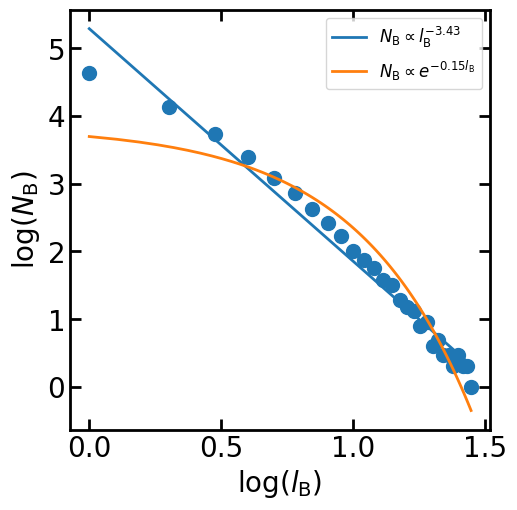

In [204]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_log, y_log)
plt.plot(x_log, y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_log_plot, y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xlabel('$\log(l_\mathrm{B})$')
plt.ylabel('$\log(N_\mathrm{B})$')
plt.legend()

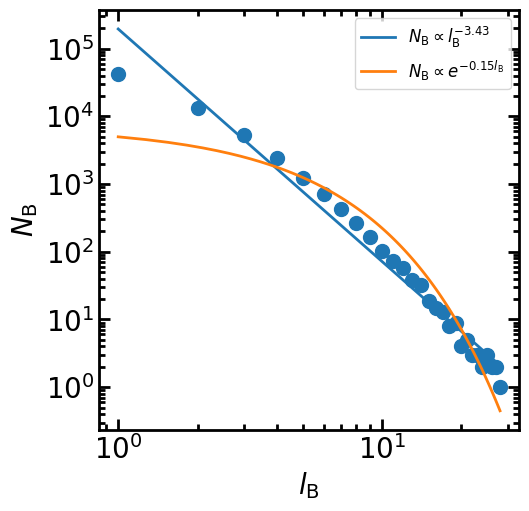

In [205]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, 10**y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_plot, 10**y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$l_\mathrm{B}$')
plt.ylabel('$N_\mathrm{B}$')
plt.legend()
plt.show()

In [206]:
def wmse(y_fit, x=x_log, y=y_log, w=size):
    return sum(w * (y_fit - y) ** 2) / sum(w) / len(y_fit)

In [207]:
wmse_pl = wmse(y_fit=y_log_pl)
wmse_pl

0.010158104106670146

In [208]:
wmse_exp = wmse(y_fit=y_log_exp)
wmse_exp

0.02247395497189478

In [209]:
wmse_pl / wmse_exp

0.4519945029423415

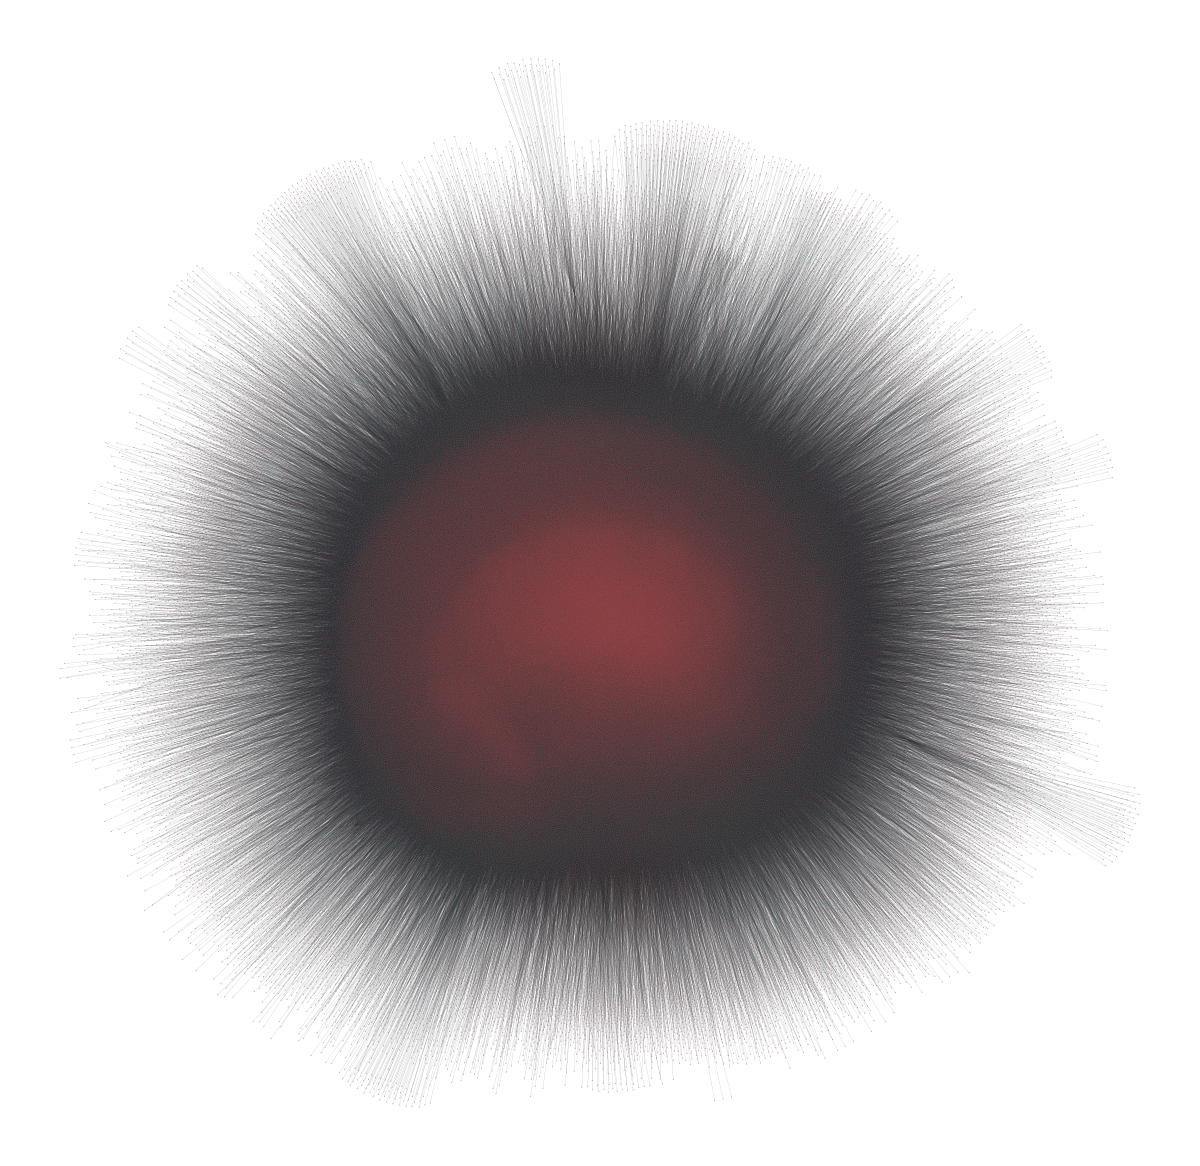

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7efbcf1f94e0, at 0x7efbcba875b0>

In [105]:
gt.graph_draw(netscience_graph)

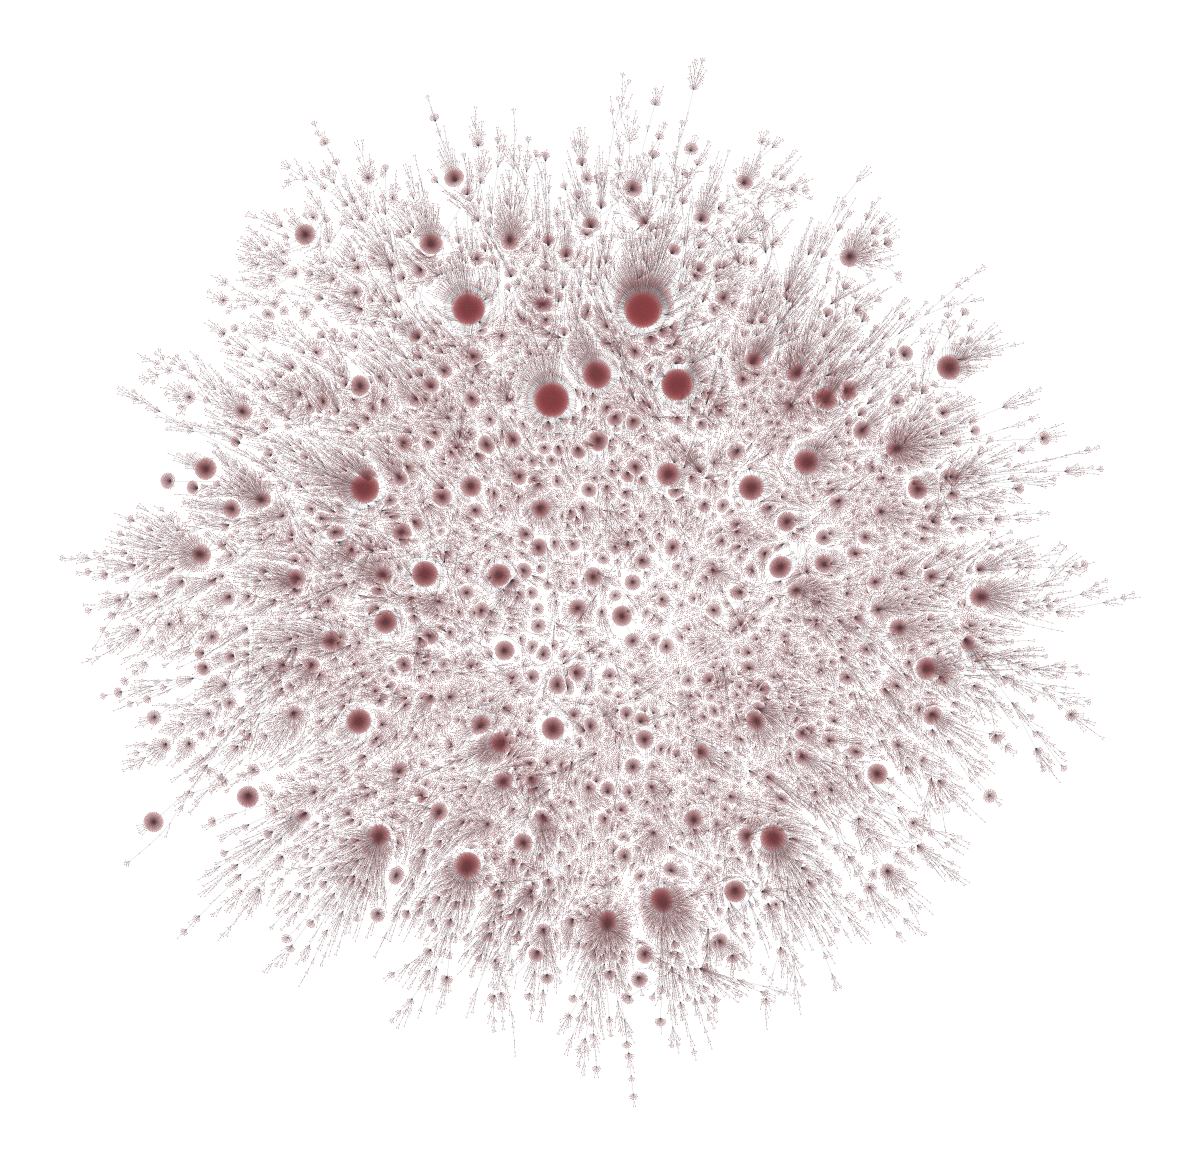

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7efbd1614a90, at 0x7efbc51fc2b0>

In [106]:
gt.graph_draw(mst_graph)